# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

**SUMMARY**

---
1. Pandas
  - Untuk melakukan manipulasi dan analisis data, terutama dalam bentuk tabel atau DataFrame.
2. Numpy
  - Untuk melakukan operasi matematika dan array multidimensi.
3. Seaborn
  - Untuk membuat visualisasi data yang lebih kompleks dan menarik dibandingkan dengan library 'matplotlib'.
4. Matplotlib
  - Untuk membuat plot dan visualisasi data dalam bentuk grafik atau diagram.
6. Warnings
  - Berguna untuk mengabaikan peringatan yang muncul pada console yang mungkin tidak diperlukan atau mengganggu.





# Load Data

In [ ]:
#connect goggle drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Day 11-12/dataset.csv")

# Data Understanding

In [ ]:
#show top 5 of dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#show dimenssion of dataframe
df.shape 

(7043, 21)

In [ ]:
#show columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#show dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**SUMMARY**
1. Type Data setiap kolom
  - SeniorCitizen(int64) seharusnya diganti ke type (object)
  - TotalCharges(object) seharusnya diganti ke type (float64)
  - Drop customerID
2. Data hilang/Null
  - Setiap kolom dari dataframe mempunyai data yang utuh yaitu 7034 data. Oleh karena itu, Tidak ada data yang Null.

In [ ]:
#change the SeniorCitizen from Int64 to Object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O').replace({0: 'No', 1: 'Yes'})

In [ ]:
#change the TotalCharges from object to float64
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))

#other way
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

In [ ]:
#show dataframe information after change the TotalCharges from object to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Statistical summary

Penyimpanan kolom di bawah memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

In [ ]:
#Separates the Dataframe into two parts, numerical and categorical
cats=[i for i in df.columns if df[i].dtypes == 'object' and i not in ['Churn', 'customerID']] #object exclude churn and customerID
nums=[i for i in df.columns if df[i].dtypes != 'object']

Selanjutnya kita munculkan ringkasan statistik dataframe

In [ ]:
#looping for categorical data
for col in cats: #melakukan looping pada kolom 'col' dengan variabel 'cats'.
    print(f'''Value count kolom {col}:''') # f = F-string (Formatted string literals) digunakan untuk mencetak teks yang berisi judul "Value count kolom" dan nama kolom col yang sedang diiterasi.
    print(df[col].value_counts()) #Mencetak jumlah kemunculan setiap nilai kategorik pada kolom 'col' dengan menggunakan metode value_counts() pada objek DataFrame.
    print() 

Value count kolom gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dty

### Pendekatan numerik

In [ ]:
#show describe for numeric dataframe
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


**SUMMARY**
1. Beberapa nilai dari setiap kolom yang tidak masuk akal
  - Minimum tenure mempunyai nilai 0, berdasarkan informasi dataframe tertera contract month-to-month, one year, dan two year. Diasumsikan, customer paling minimum berlangganan itu >= 1 bulan.
  - Nilai minimum TotalCharges tidak wajar dengan nilai 18.80. Jika dibandingkan dengan MonthlyCharges, seharusnya TotalCharges nilainya lebih tinggi. Dengan asumsi berada diangka puluhan atau ratusan karena nilai Q1-nya 401.45
2. Beberapa nilai max atau min yang berada di batas tidak wajar
  - Nilai minimum TotalCharges berada di batas tidak wajar dengan nilai maksimum-nya, karena perbedaannya sangat jauh sekali dari puluhan ke ribuan.
3. Beberapa perbedaan yang signifikan antara mean dan median (indikasi : outlier atau skewed distribution)
  - Tenure
    - Range = 72-0 = 72
    - Mean dan Median memiliki rentang nilai antara 32-29
    - Dapat diasumsikan, terdapat sejumlah nilai yang jauh dari nilai median, sehingga kemungkinan terdapat outlier dalam dataframe. Untuk memastikan lebih lanjut adanya outlier, perlu dilakukan analisis seperti boxplot atau histogram.

  - MonthlyCharges
    - Range = 118.75-18.25 = 100.5
    - Mean dan median memiliki rentang nilai antara 64-70
    - Dapat diasumsikan, tidak terdapat outlier karena rentang data tidak jauh dengan nilai mediannya.

  - TotalCharges
    - Range = 8684.80-18.80 = 8666
    - Mean dan median memiliki rentang nilai antara 2283-1397
    - Dapat diasumsikan, terdapat sejumlah nilai yang jauh dari nilai median, sehingga kemungkinan terdapat outlier dalam dataframe. 
    - Selain itu, terdapat perbedaan yang signifikan antara nilai mean dan median dapat mengindikasikan skewed distributions.
    - Untuk memastikan lebih lanjut adanya outlier dan skewed, perlu dilakukan analisis seperti boxplot atau histrogram.




### Pendekatan kategorik

In [ ]:
#show describe categorical dataframe
df[cats].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**SUMMARY**
1.  Setiap kolom pada dataframe mempunyai jumlah unique values yang masuk akal.

2. - SeniorCitizen memiliki 2 nilai, tetapi nilai "No" muncul lebih sering dengan frekuensi 5901 dari 7043 data.
   - PhoneService memiliki 2 nilai, tetapi nilai "Yes" muncul lebih sering dengan frekuensi 6361 dari 7043 data.
    - SeniorCitizen dan PhoneService mempunyai distribusi nilai yang terlalu timpnag, sehingga feature tidak akan terlalu berguna dalam klasifikasi.


## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot 

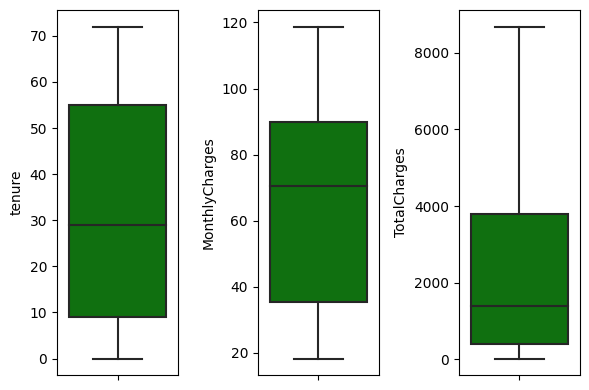

In [ ]:
#show boxplot with looping function
plt.figure(figsize=(6,4)) #membuat figure dengan size 6x4
for i in range(0, len(nums)): #looping pada setiap kolom numeric dalam dataframe
    plt.subplot(1, 3, i+1) #membuat subplot dalam figure yang berisi boxplot untuk setiap kolom numerik. (1,3) = 1 baris, 3 kolom. (i+1) = nomor subplot yang sedang diiterasi 
    sns.boxplot(y=df[nums[i]], color='green', orient='v') #membuat boxplot untuk kolom numerik yang sedang diiterasi. y adalah judul kolom numerik
    plt.tight_layout() #untuk mengatur jarak antar subplot agar lebih rapi dan mudah dibaca.

**SUMMARY**
1. Outlier dapat diidentifikasi sebagai nilai data yang lebih besar dari Upper Whisker (Q1 + 1.5 x IQR) atau lebih kecil dari Lower Whisker (Q1 - 1.5 x IQR). Pada gambar tersebut jika dikaitkan dengan definisi outlier, Kolom tenure, MonthlyCharges, dan TotalCharges tidak mempunyai outliers (outliers = 0).
2. Distribusi Data :
  - Tenure
    - Nilai median hampir menuju simetris atau hampir berada di tengah-tengah antara IQR serta Upper Whisker lebih panjang. Oleh karena itu, Distribusi datanya normal menuju right skewed.
  - MonthlyCharges
    - Nilai median tidak simetris atau tidak berada di tengah-tengah antara IQR serta panjang whisker keduanya hampir mirip, tetapi lebih panjang upper whisker. Oleh karena itu, Distribusi datanya normal menuju right skewed.
  - TotalCharges
    - Nilai median tidak simetris antara IQR serta perbedaan whisker sangat terlihat jelas yaitu upper whisker lebih panjang dibandingkan bottom whisker. Oleh karena itu, Distribusi datanya Right Skewed.

### Histplot

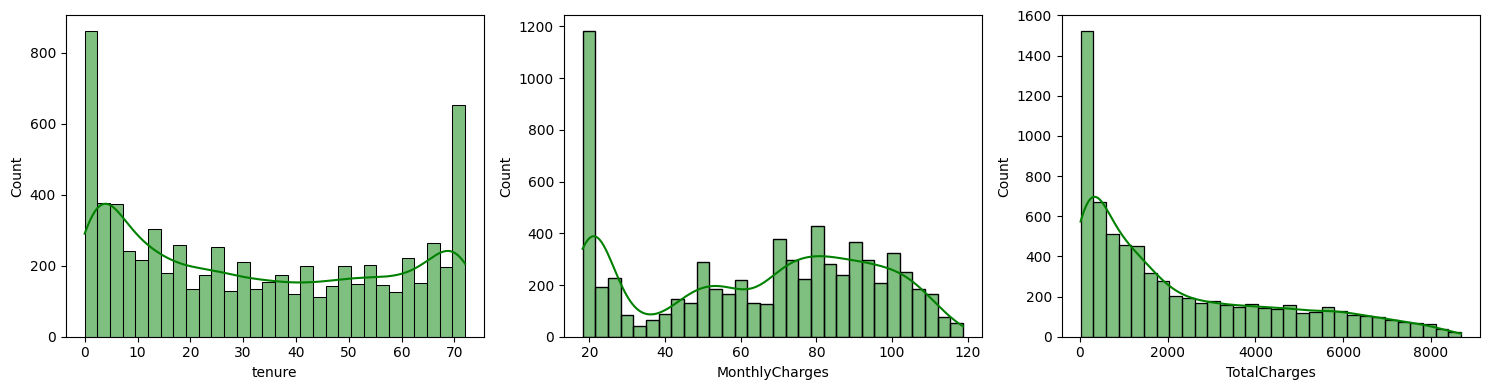

In [ ]:
#show histplot with looping function
plt.figure(figsize=(15, 4)) #membuat figure dengan size 15x4
for i in range(0, len(nums)): #looping pada setiap kolom numeric dalam dataframe
    plt.subplot(1, 3, i+1) #membuat subplot dalam figure yang berisi boxplot untuk setiap kolom numerik. (1,3) = 1 baris, 3 kolom. (i+1) = nomor subplot yang sedang diiterasi
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30) #membuat histplot untuk kolom numerik yang sedang diiterasi. (kde=True), membuat garis pada chart. (bins=30), mengatur banyaknya batang pada chart
    plt.tight_layout() #untuk mengatur jarak antar subplot agar lebih rapi dan mudah dibaca.

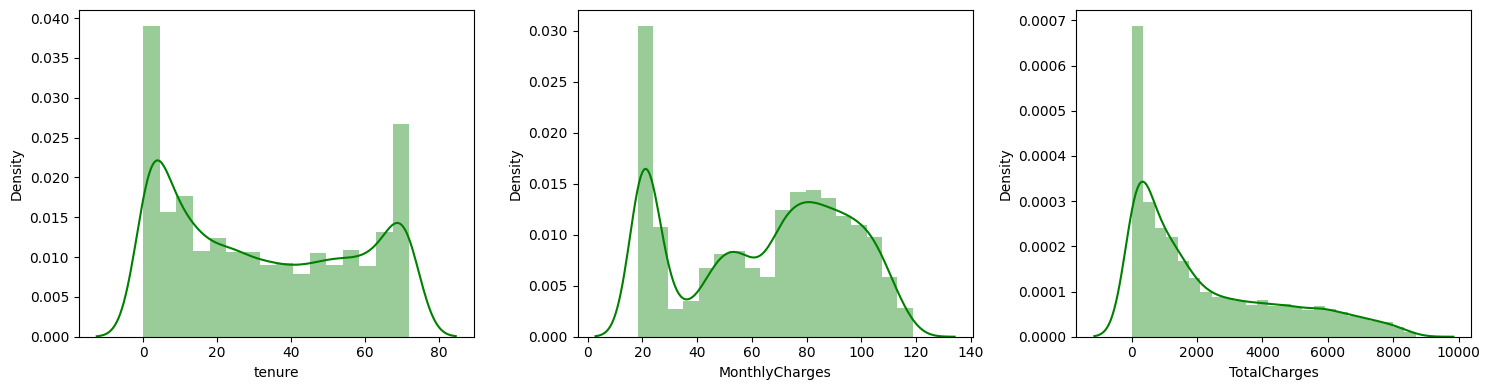

In [ ]:
#show distplot with looping function
plt.figure(figsize=(15, 4)) #membuat figure dengan size 15x4
for i in range(0, len(nums)): #looping pada setiap kolom numeric dalam dataframe
    plt.subplot(1, 3, i+1) #membuat subplot dalam figure yang berisi boxplot untuk setiap kolom numerik. (1,3) = 1 baris, 3 kolom. (i+1) = nomor subplot yang sedang diiterasi
    sns.distplot(df[nums[i]], color='green') #membuat distplot untuk kolom numerik yang sedang diiterasi.
    plt.tight_layout() #untuk mengatur jarak antar subplot agar lebih rapi dan mudah dibaca.

**SUMMARY**

Bentuk distribusi (Normal, Positive skewed, Negative skewed, Bimodal) :
  - **Tenure**, bentuk distribusi yang dimiliki adalah **Bimodal** karena mempunyai dua puncak data. Lonjakan pada distribusi data yang memiliki dua puncak atau bimodal dapat mengindikasikan adanya dua kelompok data yang berbeda yang terdapat dalam satu distribusi. Hal ini dapat terjadi pada data yang terdiri dari dua sub-populasi atau dalam konteks telco dapat mengindikasikan dua jenis pelanggan yang berbeda. Selain itu, makna dari jarak antara dua puncak yaitu semakin jauh jarak antara dua puncak, semakin jelas perbedaan antara kedua kelompok data dalam distribusi tersebut.
  - **MonthlyCharges**, bentuk distribusi yang dimiliki adalah **multimodal** karena mempunyai lebih dari dua puncak data. Lonjakan pada distribusi data yang memiliki lebih dari dua puncak atau multimodal dapat mengindikasikan adanya beberapa kelompok data yang berbeda dalam satu distribusi. Hal ini dapat terjadi pada data yang terdiri dari beberapa sub-populasi atau dalam konteks telco dapat mengindikasikan beberapa jenis pelanggan yang berbeda dengan karakteristik yang berbeda pula.
  - **TotalCharges**, bentuk distribusi yang dimiliki adalah **Right Skewed/Positive Skewed**. Dimana, nilai mean lebih besar dibandingkan dengan nilai median. Lonjakan pada distribusi data yang condong ke kanan atau right skewed dapat mengindikasikan adanya nilai-nilai ekstrim atau outlier yang mempengaruhi distribusi data. Hal ini dapat terjadi pada data dengan rentang nilai yang sangat besar atau distribusi data yang tidak normal.

### Countplot (categorical)

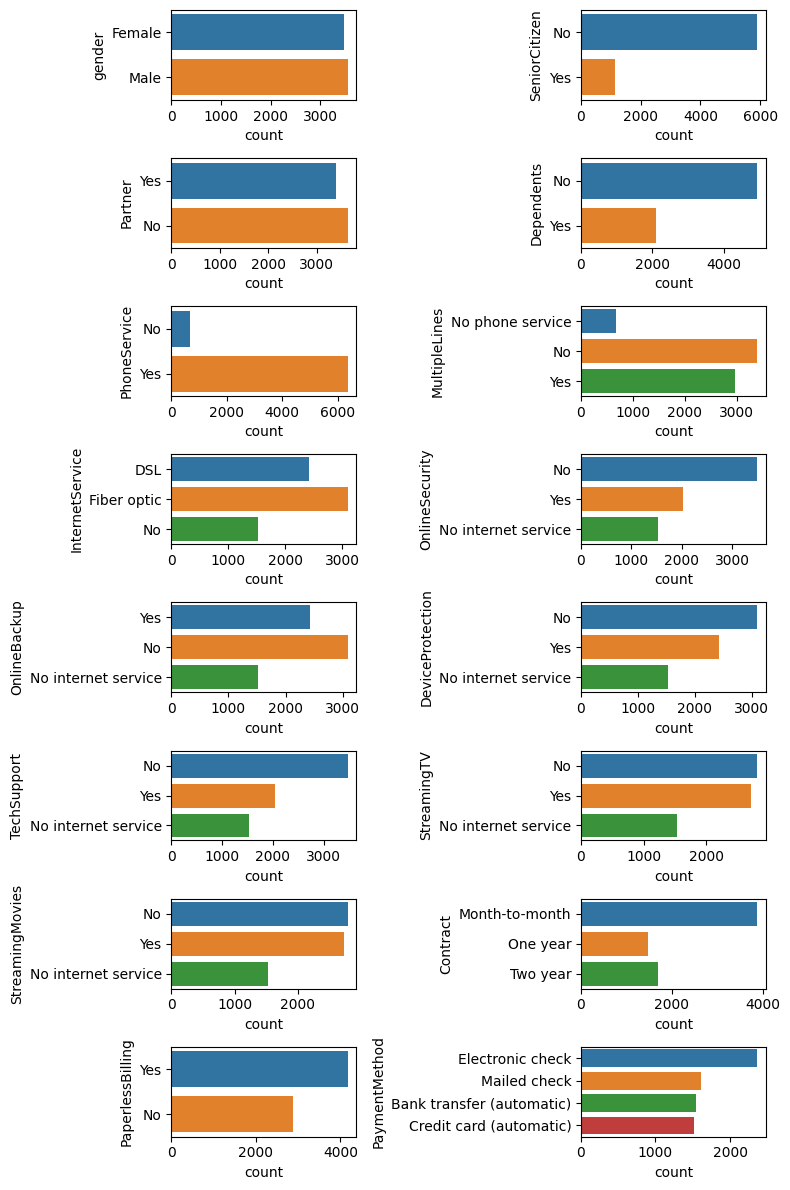

In [ ]:
#show countplot with looping function
plt.figure(figsize=(8, 12)) #membuat figure dengan size 8x12
for i in range(0, len(cats)): #looping pada setiap kolom categoric dalam dataframe
    plt.subplot(8, 2, i+1) #membuat subplot dalam figure yang berisi boxplot untuk setiap kolom numerik. (8,2) = 8 baris, 2 kolom. (i+1) = nomor subplot yang sedang diiterasi
    sns.countplot(y = df[cats[i]], orient='v') #membuat countplot untuk kolom categoric yang sedang diiterasi.
    plt.tight_layout() #untuk mengatur jarak antar subplot agar lebih rapi dan mudah dibaca.

**SUMMARY**

Pada dataframe dengan data kategorik mempunyai beberapa ketimpangan antara lain terjadi pada kolom SeniorCitizen dan PhoneService. Oleh karena itu, jika terdapat ketimpangan dapat diasumsikan terindikasinya ketidakgunaan feature tersebut sehingga pada target, sebaran yang timpang dapat membuat proses learning gagal.

## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

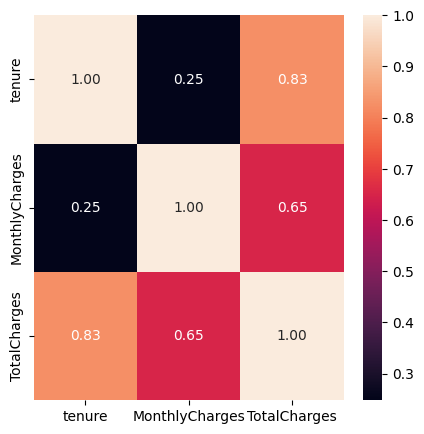

In [ ]:
#show heatmap
plt.figure(figsize=(5, 5)) ##membuat figure dengan size 5x5
sns.heatmap(df.corr(), annot=True, fmt='.2f') #membuat heatmap. (df.corr()), menghitung korelasi antar kolom pada DataFrame. (annot=True), menampilkan nilai korelasi pada heatmap. (fmt='.2f'), menampilkan 2 angka dibelakang koma

**SUMMARY**
1. - Semakin lama pelanggan berlangganan ke perusahaan telco maka semakin tinggi pula pengeluaran TotalCharges pelanggan. Oleh karena itu, Tenure dan TotalCharges mempunyai korelasi positif yang sangat tinggi yaitu 0.83.
  - Semakin tinggi pelanggan membayar MonthlyCharges ke perusahaan telco maka semakin tinggi pula pengelluaran TotalCharges pelanggan. Oleh karena itu, MonthlyCharges dan TotalCharges mempunyai korelasi positif yang kuat yaitu 0.65.
  - Jika pelanggan belum lama berlangganan dengan perusahaa telco maka pembayaran MonthlyCharges-nya pun tidak tinggi. Oleh karena itu, Tenure dan MonthlyCharges mempunyai korelasi yang rendah yaitu 0.25, sehingga pelanggan tersebut tidak terlalu memengaruhi perusahaan telco.
2.  Tidak terdapat 2 feature yang berkorelasi sangat kuat diatas 0.90. Namun pada tenure dan monthlycharges keduanya memiliki korelasi yang cukup kuat dengan totalcharges. Korelasi tersebut dapat terjadi ketika lama waktu berlangganan akan memengaruhi biaya yang dikenakan pada pelanggan perbulannya dan tagihan perbulannya akan memengaruhi total tagihan yang dibebankan pada pelanggan. Sehinga, ketika tenure dan monthlycharge bernilai tinggi maka totalcharges pun akan tinggi pula. Oleh karena itu, ada kemungkinan besar kedua feature tersebut yaitu tenure dan monthlycharges redundan, sehingga feature tersebut tidak perlu digunakan. Karena redundan dapat menyebabkan berbagai masalah, seperti memperbesar ukuran data dan membuat proses pengolahan data menjadi lebih lambat dan kompleks. 

### Category Plot

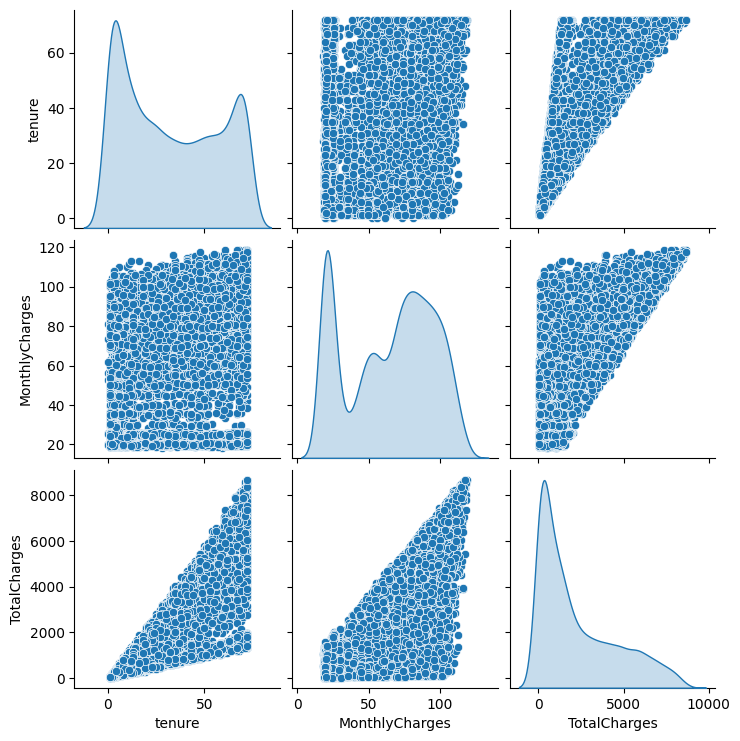

In [ ]:
#create pairplot
#Pairplot adalah salah satu jenis plot yang sangat berguna dalam data analysis. 
#Pairplot memungkinkan untuk memvisualisasikan hubungan antar kolom pada DataFrame secara simultan. 
#Dengan demikian, lebih mudah melihat pola hubungan yang terbentuk antar kolom, serta menentukan korelasi yang mungkin ada antar variabel tersebut. 
sns.pairplot(df, diag_kind = 'kde') #membuat pairplot yang menunjukkan hubungan antar kolom pada DataFrame secara visual. (diag_kind), untuk menentukan jenis plot pada diagonal, salah satunya 'kde'.

**SUMMARY**

Diasumsikan terdapat cluster yang cukup jelas antara tenure dan monthlycharges terhadap totalcharges. Pada tenure dan monthlycharges terdapat sekelompok titik data yang cenderung berkumpul atau bergerombol di sekitar titik-titik tertentu di plot. Oleh karena itu, karena adanya cluster pada scatter plot, memungkinkan bahwa ada feature atau variabel yang dapat dipertimbangkan sebagai petunjuk untuk membuat feature baru

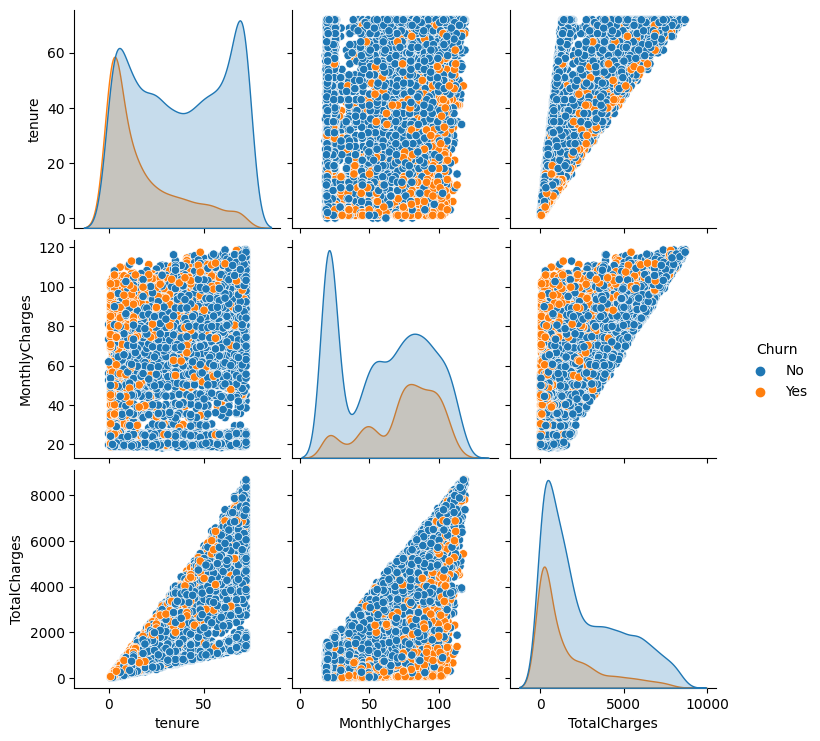

In [ ]:
#create pairplot
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn') #(hue='Churn'), untuk memberikan warna pada plot berdasarkan kategori pada kolom 'Churn'. 
#pairplot akan menampilkan plot untuk setiap pasangan variabel dalam DataFrame, dan mengelompokkan plot berdasarkan label 'Churn'

**SUMMARY**

Scatter plot tenure dengan monthlycharges dan monthlycharges dengan totalcharges, memiliki perbedaan warna yang cukup jelas terpisah. Pada scatter plot tenure dengan monthlycharges, jika pelanggan baru saja berlangganan tetapi biaya perbulan yang dibayarkan kepada perusahaan cukup tinggi, maka banyak churn yang akan terjadi sedangan pada scatter plot monthlycharges dengan totalcharges, jika biaya pelanggan perbulannya cukup tinggi dan total biaya yang dibayarkan juga cukup tinggi, maka akan terjadi banyak churn di perusahaan tersebut. Oleh karena itu, target yang terpisah tersebut dapat menjadi indikasi kombinasi fitur yang baik.